# Assignment 2 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

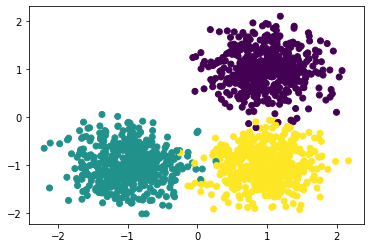

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [4]:
X.shape[1]

2

In [5]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[311.65483714940325, 310.48020650953464, 313.08965592139543, 347.9164681463572, 312.14184565955566, 313.56784897713203, 295.6686474841335, 311.658561893835, 312.14184565955566, 311.3428815803688, 313.4632438666223]

Min Inertia
295.6686474841335

Low Inertia model
KMeans(init=array([[0.89138365, 0.13542329],
       [0.38232265, 0.36257735],
       [0.62525834, 0.21900648],
       [0.67600509, 0.05073688],
       [0.28905668, 0.51671365],
       [0.8211014 , 0.67474575]]),
       n_clusters=6, n_init=1, random_state=0)


In [6]:
# Distortion 
best_model.inertia_

295.6686474841335

In [7]:
# Number of clusters
best_model.cluster_centers_

array([[ 1.23590216, -0.91444653],
       [-1.01645321, -1.29413452],
       [ 0.73622601,  0.77386113],
       [ 0.59847014, -1.1051428 ],
       [-1.00556991, -0.67045846],
       [ 1.1932953 ,  1.21917194]])

In [8]:
# Number of iterations 
best_model.n_iter_

12

In [9]:
# Predictions 
predict = best_model.predict(X)
predict

array([1, 0, 4, ..., 2, 1, 5], dtype=int32)

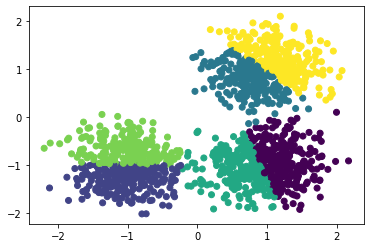

In [10]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)

In [38]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.show()
    return centers

Centers


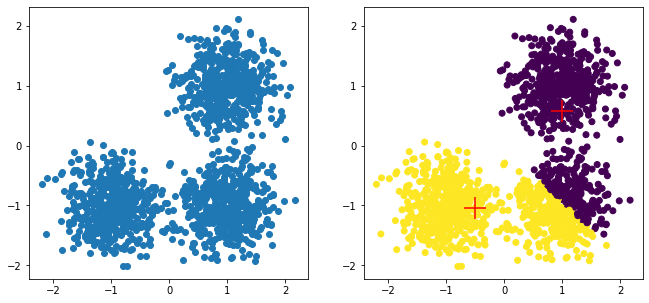

DeviceArray([[ 1.0037225 ,  0.57043123],
             [-0.49280208, -1.0366012 ]], dtype=float32)

In [39]:
fcmeans(X,2)

For i  1
Centers


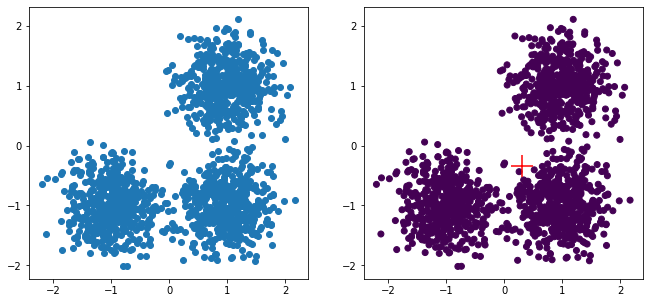

For i  2
Centers


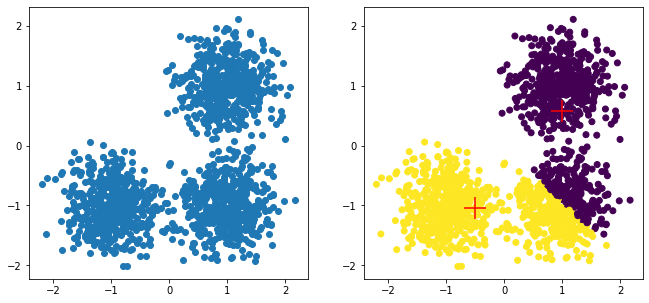

For i  3
Centers


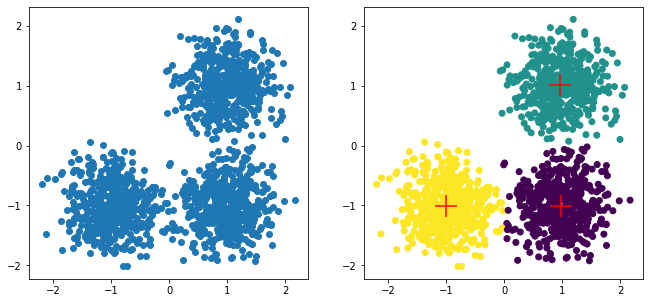

For i  4
Centers


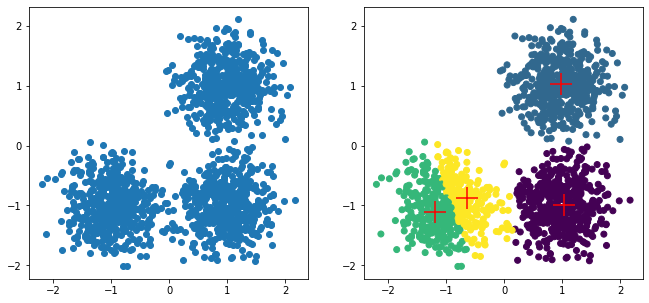

For i  5
Centers


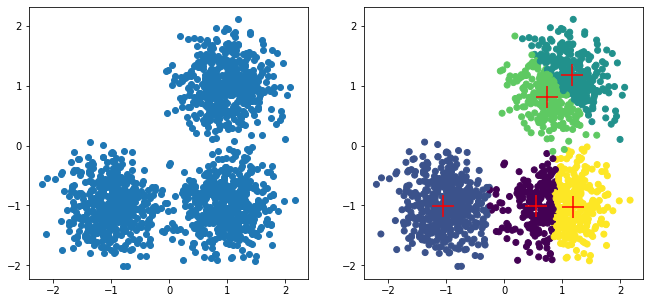

In [16]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [52]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [53]:
type (np.random.rand(2,2))

numpy.ndarray

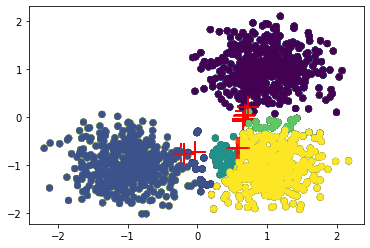

In [57]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int """
    
    res = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        res.append(membership[0])
        for j in res:
            plabels = np.argmax(j, axis=1)
            plt.scatter(X[:,0], X[:,1], c=plabels)
            plt.scatter(membership[1][:,0], membership[1][:,1], marker="+", s=500, c='r' )
        
    
labs = use_posbc(5,5,X)

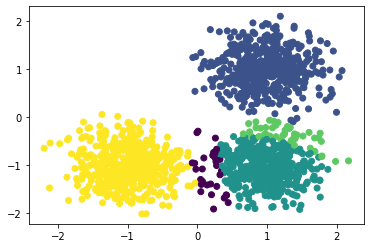

In [42]:
# Plot the r